In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#oecd health spending 
spending_df = pd.read_csv('spending.csv')
#oecd life expectancy
expectancy_df = pd.read_csv('expectancy.csv')

In [4]:
spending_df.columns

Index(['HF', 'Financing scheme', 'HC', 'Function', 'HP', 'Provider', 'MEASURE',
       'Measure', 'LOCATION', 'Country', 'TIME', 'Year', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [5]:
expectancy_df.rename(columns={'COU': 'LOCATION'}, inplace=True)


In [6]:
(spending_df.merge(expectancy_df, on = ['LOCATION', 'Year']))

,HF,Financing scheme,HC,Function,HP,Provider,MEASURE,Measure_x,LOCATION,Country_x,...,Flags_x,VAR,Variable,UNIT,Measure_y,Country_y,YEA,Value_y,Flag Codes_y,Flags_y
0,HFTOT,All financing schemes,HCTOT,Current expenditure on health (all functions),HPTOT,All providers,MLLNCU,Current prices,AUS,Australia,...,NaN,EVIEFE00,Females at birth,EVIDUREV,Years,Australia,1971,74.9,NaN,NaN
1,HFTOT,All financing schemes,HCTOT,Current expenditure on health (all functions),HPTOT,All providers,MLLNCU,Current prices,AUS,Australia,...,NaN,EVIEFE40,Females at age 40,EVIDUREV,Years,Australia,1971,37.4,NaN,NaN
2,HFTOT,All financing schemes,HCTOT,Current expenditure on health (all functions),HPTOT,All providers,MLLNCU,Current prices,AUS,Australia,...,NaN,EVIEFE60,Females at age 60,EVIDUREV,Years,Australia,1971,20.0,NaN,NaN
3,HFTOT,All financing schemes,HCTOT,Current expenditure on health (all functions),HPTOT,All providers,MLLNCU,Current prices,AUS,Australia,...,NaN,EVIEFE65,Females at age 65,EVIDUREV,Years,Australia,1971,16.1,NaN,NaN
4,HFTOT,All financing schemes,HCTOT,Current expenditure on health (all functions),HPTOT,All providers,MLLNCU,Current prices,AUS,Australia,...,NaN,EVIEFE80,Females at age 80,EVIDUREV,Years,Australia,1971,7.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727437,HF2,Voluntary health care payment schemes,HC7,Governance and health system and financing adm...,HPTOT,All providers,PPPPER,"Per capita, current prices, current PPPs",BRA,Brazil,...,NaN,EVIEHO00,Males at birth,EVIHFEEV,Difference male-female (years),Brazil,2017,-6.7,NaN,NaN
5727438,HF2,Voluntary health care payment schemes,HC7,Governance and health system and financing adm...,HPTOT,All providers,PPPPER,"Per capita, current prices, current PPPs",BRA,Brazil,...,NaN,EVIEHO40,Males at age 40,EVIHFEEV,Difference male-female (years),Brazil,2017,-5.1,NaN,NaN
5727439,HF2,Voluntary health care payment schemes,HC7,Governance and health system and financing adm...,HPTOT,All providers,PPPPER,"Per capita, current prices, current PPPs",BRA,Brazil,...,NaN,EVIEHO60,Males at age 60,EVIHFEEV,Difference male-female (years),Brazil,2017,-3.6,NaN,NaN
5727440,HF2,Voluntary health care payment schemes,HC7,Governance and health system and financing adm...,HPTOT,All providers,PPPPER,"Per capita, current prices, current PPPs",BRA,Brazil,...,NaN,EVIEHO65,Males at age 65,EVIHFEEV,Difference male-female (years),Brazil,2017,-3.2,NaN,NaN


In [34]:
def tweak_data(spending_df, expectancy_df):
    return (spending_df.query('MEASURE=="MLLNCU"').groupby(['Year','LOCATION']).first().Value.rename('Spending_USD').to_frame()
            .merge(expectancy_df.groupby(['Year','LOCATION']).Value.mean().rename('Life_expectancy').to_frame(),left_index=True,
                   right_index=True).reset_index()
    )

def plot_spend_vs_expect(group,ax):
    color = 'red' if group.name == 'USA' else '#ddd'
    group.plot(x='Spending_USD', y= 'Life_expectancy',ax=ax, c= color, legend=False)
    ax.text(group.Spending_USD.iloc[-1],
            group.Life_expectancy.iloc[-1], group.name , color=color
            )
    
    
        

In [23]:
df= tweak_data(spending_df, expectancy_df)

In [24]:
df.to_csv('owid-spending-vs-lifeexp.csv')

In [25]:
df

,Year,LOCATION,Spending_USD,Life_expectancy
0,1970,AUT,1405.420,16.642857
1,1970,BEL,1276.550,16.947619
2,1970,CHE,5202.400,17.642857
3,1970,CZE,7543.000,16.333333
4,1970,DEU,4794.900,16.761905
...,...,...,...,...
1588,2017,SVN,792.524,20.557143
1589,2017,SWE,498821.000,21.061905
1590,2017,TUR,1079.547,19.433333
1591,2017,USA,5422.980,20.014286


In [26]:
df = pd.read_csv('owid-spending-vs-lifeexp.csv')


0       False
1       False
2       False
3       False
4       False
        ...  
1588    False
1589    False
1590    False
1591     True
1592    False
Name: LOCATION, Length: 1593, dtype: bool

/tmp/ipykernel_27938/1218979314.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.groupby('LOCATION').apply(plot_spend_vs_expect,ax=ax))


(15.0, 50.0)

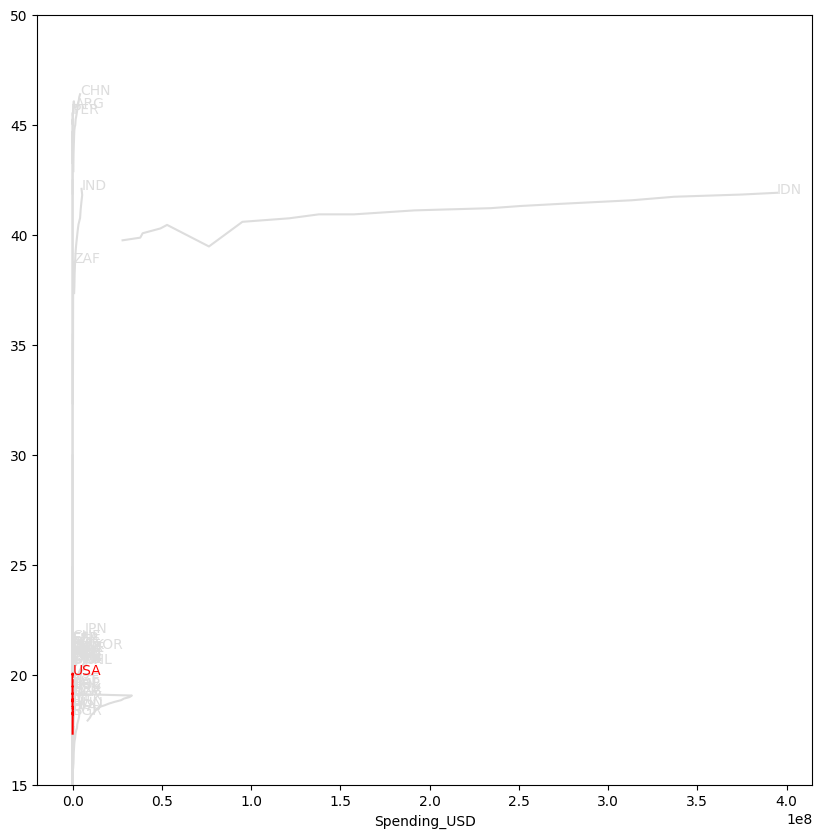

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

(df.groupby('LOCATION').apply(plot_spend_vs_expect,ax=ax))

# Adjusting axis limits to fit the data
#ax.set_xlim(left=1e2, right=1e8)  # Adjust as necessary based on your data
ax.set_ylim(15, 50)  # Adjust based on your life expectancy data
